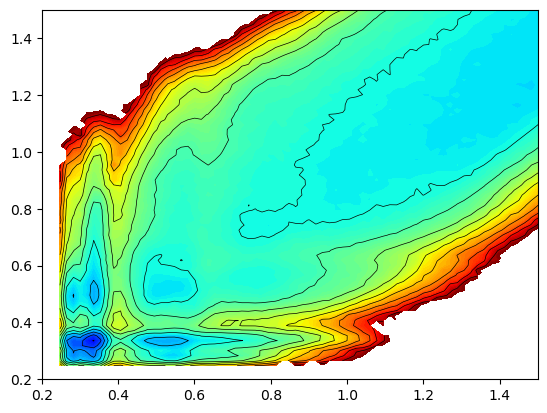

In [ ]:
k = 'CA_0.85'
Ubias = -fes[k] * (1-1/BIASF)

WEIGHTS, ED = np.histogramdd(COLVARS[k][['cn', 'd_580', 'd_489']].to_numpy(), #[tstart:tfinal], 
                            bins = [Nbins_CN[k], Nbins_D2[k], Nbins_D1[k]],
                            range = (Bonds_CN[k], Bonds_D2[k], Bonds_D1[k]),
                            density=True, 
                            )
weighted_avg = np.sum(np.exp(1/kBT * Ubias) * WEIGHTS, axis=0)
weighted_avg[weighted_avg==0]=np.nan
norm = np.sum(np.exp(1/kBT * (Ubias-np.max(Ubias))))
fes_dens = -kBT * np.log(weighted_avg/norm)
vmax = np.nanmax(fes_dens)//10 * 10
h = plt.contourf(dist1[k][0, 0, :], dist2[k][0, :, 0], fes_dens, 
            cmap = 'jet', 
            origin = 'lower',
            levels = np.arange(0, vmax, 1), 
            )

plt.contour(dist1[k][0, 0, :], dist2[k][0, :, 0], fes_dens, 
            colors = 'k', 
            linewidths=0.5,
            levels = np.arange(0, vmax, 5)
            )
plt.xlim(0.2, 1.5)
plt.ylim(0.2, 1.5)

plt.show()

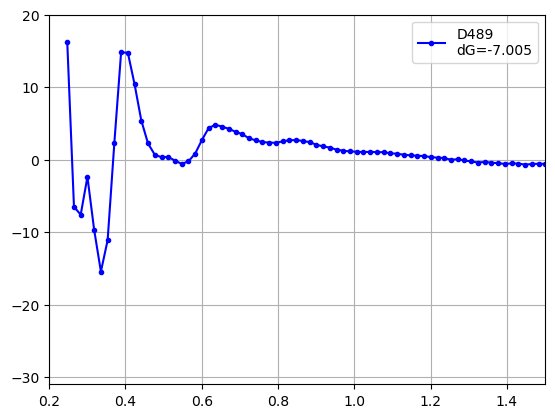

In [ ]:
Ubias_d = -fes_dens
WEIGHTS_d = np.nansum(WEIGHTS, axis=0)
dist = dist1[k][0, 0, :]

# dist_dens = np.nansum(np.exp(-fes_dens/kBT),axis=0) #/np.nansum(np.exp(-fes_dens/kBT))
dist_dens = np.nansum(np.exp(1/kBT * Ubias_d) * WEIGHTS_d, axis=0)
# weighted_avg = np.sum(np.exp(1/kBT * Ubias) * WEIGHTS, axis=0)
# dist_dens[dist_dens==0]=np.nan
norm = np.nansum(np.exp(1/kBT * (Ubias_d)))
dist_fes = -kBT * np.log(dist_dens/norm)


is_bulk=np.int_((BULK_MIN < dist) & (dist < BULK_MAX))
shift = np.nansum(is_bulk*dist_fes)/np.nansum(is_bulk) #np.mean(dist_fes[is_bulk==1]) #/np.sum(is_bulk)
dist_fes -= shift
dG_489 = dG_calc(dist, dist_fes, BOND_MAX=0.4, R_RES=0.9)

plt.plot(dist, dist_fes, '.-', label = f'D489\ndG={round(dG_489, 3)}', color = 'blue')
plt.xlim(0.2, 1.5)
plt.grid()
plt.yticks(np.arange(-30, 30, 10))
plt.ylim(-31, 20)
plt.legend()
plt.show()

In [ ]:
k = 'MG_0.8'

dens = np.sum(np.exp(-fes[k]/kBT),axis=0)/np.sum(np.exp(-fes[k]/kBT))
fes_dens = -kBT*np.log(dens) 
fes_dens -= np.nanmin(fes_dens)
h = plt.contourf(dist1[k][0, 0, :], dist2[k][0, :, 0], fes_dens, 
            cmap = 'jet', 
            origin = 'lower',
            aspect = 'equal',
            # vmin=0,
            # vmax=100
            levels = np.arange(0, 100, 1), 
            # algorithm='threaded'
            #extend='max'
            )
h = plt.colorbar()
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axvline(2)
plt.axvline(2.5)
plt.axhline(2)
plt.axhline(2.5)
plt.show()

x = dist1[k][0, 0, :]
dist_dens = np.nansum(np.exp(-fes_dens/kBT),axis=0)/np.nansum(np.exp(-fes_dens/kBT))
dist_fes = -kBT*np.log(dist_dens)

is_bulk=np.int_((2 < x) & (x < 2.5))

shift = np.sum(is_bulk*dist_fes)/np.sum(is_bulk) #np.mean(dist_fes[is_bulk==1]) #/np.sum(is_bulk)
dist_fes -= shift
dG = dG_calc(x, dist_fes, BOND_MAX=0.4, R_RES=0.9)
print(dG)
plt.plot(x, dist_fes)
plt.xlim(0, 2)
plt.ylim(-35, 25)
plt.grid()
